#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/t/ab8726f0cfc84544abbae69a6be88071

## Librerias

In [2]:
import pandas as pd

import urllib.request
from PIL import Image

## Data

In [83]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")


## Data exploration

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73363 entries, 0 to 73362
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    73363 non-null  int64  
 1   target                                73363 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  73363 non-null  float64
 3   age                                   73363 non-null  object 
 4   NumberOfTime30-59DaysPastDueNotWorse  73363 non-null  int64  
 5   DebtRatio                             73363 non-null  float64
 6   MonthlyIncome                         58796 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       73363 non-null  int64  
 8   NumberOfTimes90DaysLate               73363 non-null  int64  
 9   NumberRealEstateLoansOrLines          73363 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  73363 non-null  int64  
 11  NumberOfDepende

In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31442 entries, 0 to 31441
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    31442 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  31442 non-null  float64
 2   age                                   31442 non-null  object 
 3   NumberOfTime30-59DaysPastDueNotWorse  31442 non-null  int64  
 4   DebtRatio                             31442 non-null  float64
 5   MonthlyIncome                         25228 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       31442 non-null  int64  
 7   NumberOfTimes90DaysLate               31442 non-null  int64  
 8   NumberRealEstateLoansOrLines          31442 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  31442 non-null  int64  
 10  NumberOfDependents                    30635 non-null  float64
dtypes: float64(4), 

In [5]:
train.head()

,Id,target,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,44164,0,0.768219,68y,1,0.687930,2178.0,12,0,1,0,0.0
1,95356,0,0.289873,52y,0,0.385497,3750.0,16,0,1,0,1.0
2,108917,0,0.000000,54y,0,0.346503,6833.0,8,0,1,0,0.0
3,99039,0,0.046064,66y,1,0.407614,5200.0,6,0,1,0,1.0
4,116168,0,0.168771,45y,0,4702.000000,NaN,10,0,3,0,1.0


In [7]:
train.isna().sum()/len(train)*100

Id                                       0.000000
target                                   0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.856058
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.647111
dtype: float64

In [86]:
test.isna().sum()/len(train)*100

Id                                      0.00000
RevolvingUtilizationOfUnsecuredLines    0.00000
age                                     0.00000
NumberOfTime30-59DaysPastDueNotWorse    0.00000
DebtRatio                               0.00000
MonthlyIncome                           8.47021
NumberOfOpenCreditLinesAndLoans         0.00000
NumberOfTimes90DaysLate                 0.00000
NumberRealEstateLoansOrLines            0.00000
NumberOfTime60-89DaysPastDueNotWorse    0.00000
NumberOfDependents                      1.10001
dtype: float64

## Data processing

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
# Funciones

def data_report(df):
    '''Esta funcion describe los campos de un dataframe de pandas de forma bastante clara, crack'''
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["MISSINGS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos['UNIQUE_VALUES']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDIN (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('COL_N', drop=True, inplace=True)


    return concatenado.T

In [12]:
data_report(train).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
Id,int64,0.0,73363,100.0
target,int64,0.0,2,0.0
RevolvingUtilizationOfUnsecuredLines,float64,0.0,62269,84.88
age,object,0.0,84,0.11
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,15,0.02
DebtRatio,float64,0.0,59279,80.8
MonthlyIncome,float64,19.86,10564,14.4
NumberOfOpenCreditLinesAndLoans,int64,0.0,56,0.08
NumberOfTimes90DaysLate,int64,0.0,17,0.02


In [90]:
data_report(test).T

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
Id,int64,0.0,31442,100.0
RevolvingUtilizationOfUnsecuredLines,float64,0.0,26892,85.53
age,object,0.0,81,0.26
NumberOfTime30-59DaysPastDueNotWorse,int64,0.0,13,0.04
DebtRatio,float64,0.0,27036,85.99
MonthlyIncome,float64,19.76,6769,21.53
NumberOfOpenCreditLinesAndLoans,int64,0.0,47,0.15
NumberOfTimes90DaysLate,int64,0.0,17,0.05
NumberRealEstateLoansOrLines,int64,0.0,17,0.05


In [89]:
print(f'{train.shape}')
print(f'{test.shape}')

(73363, 12)
(31442, 11)


In [91]:
# Modificaremos la variable 'age', esta contiene un número y una letra al final, solo dejaremos el número

train['age'] = train ['age'].map (lambda x: x.rstrip('y')).astype(int)
test['age'] = test ['age'].map (lambda x: x.rstrip('y')).astype(int)

In [76]:
# Este valor de la media y la mediana la guardamos para imputar tambien los NaN de la misma varible en TEST
media_Montly_I_train = train['MonthlyIncome'].mean()
print(f'{media_Montly_I_train}')
mediana_NumberOfDep_train = train['NumberOfDependents'].median()
print(f'{mediana_NumberOfDep_train}')

6649.1446697054225
0.0


In [92]:
# Imputamos los NaN de la variable 'MonthlyIncome' y 'NumberOfDependents', asignando el valor de la mediana
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(value=media_Montly_I_train)
train['NumberOfDependents'] = train['NumberOfDependents'].fillna(value=mediana_NumberOfDep_train)

#test
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(value=media_Montly_I_train)
test['NumberOfDependents'] = test['NumberOfDependents'].fillna(value=mediana_NumberOfDep_train)


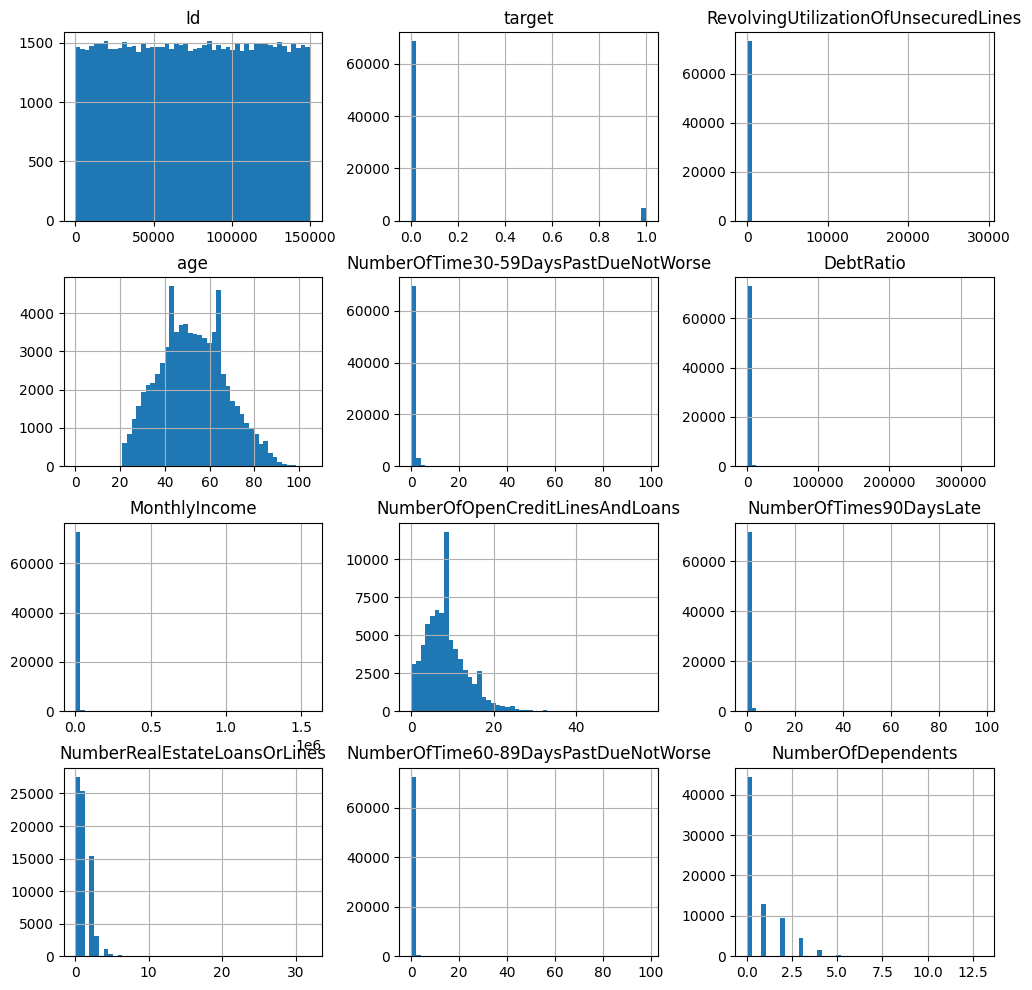

In [78]:
train.hist(bins=50, figsize=(12,12))
plt.show()

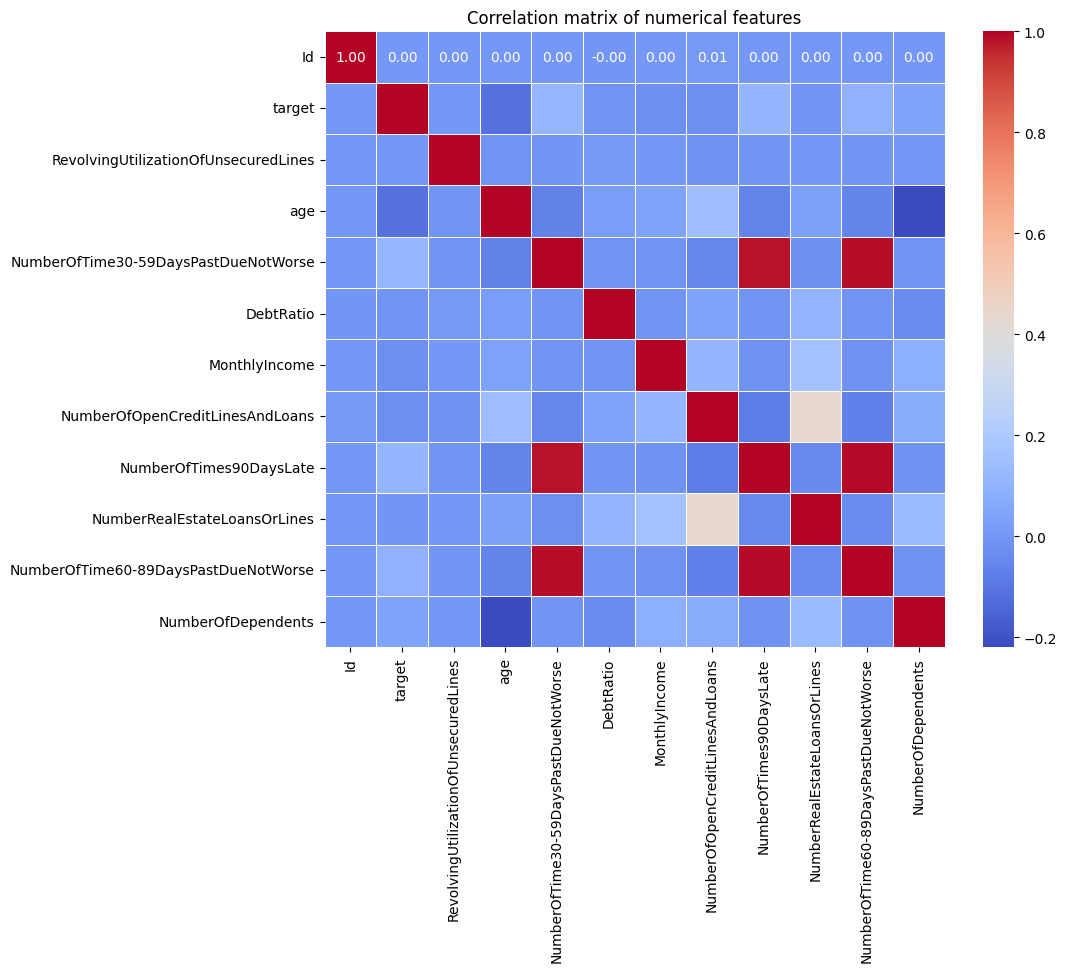

In [79]:
plt.figure(figsize=(10, 8))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix of numerical features')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

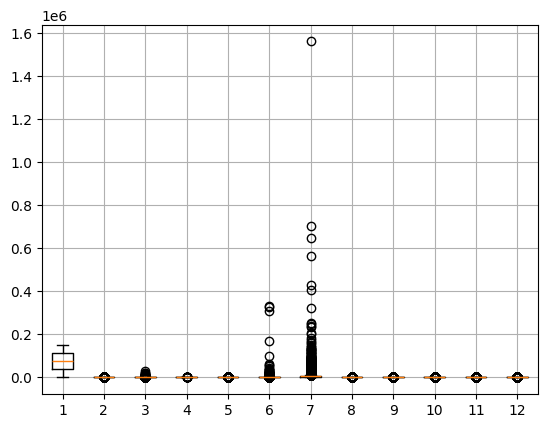

In [82]:
plt.boxplot(train, vert=True)
plt.grid(True)
plt.show

In [30]:
train.columns

Index(['Id', 'target', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [93]:
test.columns

Index(['Id', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [41]:
#Observaremos cuales son los outliers de cada una de las variables del dataset.
variable = ''
for variable in train.columns:
    print(f'{variable}')
    Q1 = train[variable].quantile(0.25)
    print(f'Primer cuartil: {Q1}')
    Q3 = train[variable].quantile(0.75)
    print(f'Tercer cuartil: {Q3}')
    IRQ = Q3-Q1
    print (f'Rango intercualrtil: {IRQ}')
    mediana = train[variable].median()
    print (f'Mediana: {mediana}')
    min = train[variable].min()
    print (f'Valor minimo: {min}')
    max = train[variable].max()
    print (f'Valor maximo: {max}')
    BI = (Q1 - 1.5 * IRQ)
    print (f'Bigote Inferior: {BI}')
    BS = (Q3 + 1.5 * IRQ)
    print (f'Bigote Superior: {BS}')
    print('---------------------------------------------------------------')

Id
Primer cuartil: 37449.0
Tercer cuartil: 112628.5
Rango intercualrtil: 75179.5
Mediana: 75032.0
Valor minimo: 2
Valor maximo: 149998
Bigote Inferior: -75320.25
Bigote Superior: 225397.75
---------------------------------------------------------------
target
Primer cuartil: 0.0
Tercer cuartil: 0.0
Rango intercualrtil: 0.0
Mediana: 0.0
Valor minimo: 0
Valor maximo: 1
Bigote Inferior: 0.0
Bigote Superior: 0.0
---------------------------------------------------------------
RevolvingUtilizationOfUnsecuredLines
Primer cuartil: 0.029751736999999952
Tercer cuartil: 0.5586858845
Rango intercualrtil: 0.5289341475
Mediana: 0.154687564
Valor minimo: 0.0
Valor maximo: 29110.0
Bigote Inferior: -0.76364948425
Bigote Superior: 1.35208710575
---------------------------------------------------------------
age
Primer cuartil: 41.0
Tercer cuartil: 63.0
Rango intercualrtil: 22.0
Mediana: 52.0
Valor minimo: 0
Valor maximo: 105
Bigote Inferior: 8.0
Bigote Superior: 96.0
------------------------------------

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [94]:
X =  train.drop(['target'], axis=1)
y = train['target'].copy()
print(f'{X.shape}')
print(f'{y.shape}')

(73363, 11)
(73363,)


### 2. Dividir X_train, X_test, y_train, y_test

In [64]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 3. Asignar el modelo (vacío) a una variable


In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


# Crear y entrenar el modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de AUC.

In [97]:
# Realizar predicciones en el conjunto de prueba
y_pred_proba = rf_model.predict_proba(X_test)

# Calcular el AUC-ROC para cada clase
auc_roc_scores = []
for class_index in range(rf_model.n_classes_):
    auc_roc_score_class = roc_auc_score((y_test == class_index).astype(int), y_pred_proba[:, class_index])
    auc_roc_scores.append(auc_roc_score_class)

# Calcular el AUC-ROC Macro (media no ponderada)
auc_roc_macro = sum(auc_roc_scores) / len(auc_roc_scores)

print(f'AUC-ROC Macro: {auc_roc_macro}')

# Además, puedes calcular el F1 Score Macro para evaluar el modelo en términos de precisión y recall
y_pred = rf_model.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
print(f'F1 Score Macro: {f1_macro}')

AUC-ROC Macro: 0.842934586744174
F1 Score Macro: 0.618386471525485


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

In [99]:
rf_model_T = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_T.fit(X, y)

RandomForestClassifier(random_state=42)

### 2. Carga los datos de `test.csv` para predecir.

In [117]:
#X_pred = pd.read_csv("data/test.csv")
X_pred = test
X_pred.head()

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53,0,0.009350,2245.00000,3,0,0,0,0.0
1,94308,0.022133,57,0,0.319562,7672.00000,26,0,1,0,2.0
2,53983,0.013693,68,0,0.139237,4064.00000,4,0,0,0,1.0
3,61359,0.018568,74,0,0.018760,10500.00000,27,0,0,0,0.0
4,71383,0.008630,66,0,9.000000,6649.14467,5,0,0,0,0.0


In [118]:
X_pred

,Id,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,15576,0.051782,53,0,0.009350,2245.00000,3,0,0,0,0.0
1,94308,0.022133,57,0,0.319562,7672.00000,26,0,1,0,2.0
2,53983,0.013693,68,0,0.139237,4064.00000,4,0,0,0,1.0
3,61359,0.018568,74,0,0.018760,10500.00000,27,0,0,0,0.0
4,71383,0.008630,66,0,9.000000,6649.14467,5,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31437,110527,0.469451,28,0,0.029072,2166.00000,1,0,0,0,0.0
31438,121978,0.171910,44,0,0.375557,5833.00000,8,0,2,0,4.0
31439,77327,0.004842,51,1,30.000000,0.00000,3,0,0,0,2.0
31440,48341,0.636554,42,0,0.483931,7000.00000,10,2,1,0,1.0


IMPORTANTE: APLICAR LO MISMO A ESTOS DATOS QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [ ]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [119]:
predictions_submit = rf_model_T.predict(X_pred)
predictions_submit

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [120]:
sample = pd.read_csv("data/sample_submission.csv")

In [121]:
sample.head()

,Id,target
0,15576,0
1,94308,1
2,53983,1
3,61359,1
4,71383,0


In [122]:
sample.shape

(31442, 2)

In [123]:
sample.columns

Index(['Id', 'target'], dtype='object')

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [124]:
submission = pd.DataFrame({"Id": sample['Id'], "target": predictions_submit})

In [126]:
submission['target'].value_counts()

target
0    30800
1      642
Name: count, dtype: int64

In [127]:
submission.head()

,Id,target
0,15576,0
1,94308,0
2,53983,0
3,61359,0
4,71383,0


In [128]:
submission.shape

(31442, 2)

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [129]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.Id.all() == sample.Id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [130]:
chequeator(submission)

You're ready to submit!
